In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2023-11-03 04:24:42.396139: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 04:24:42.847718: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 04:24:42.847808: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 04:24:42.848094: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-03 04:24:42.996960: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-03 04:24:42.997956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
datas = pd.read_csv("/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/pre_processing_data/data_eda.csv")


In [3]:
datas["Target"] = datas["Target"].map( {
    "Dropout":1,
    "Graduate":0,
    "Enrolled":0
})

In [4]:
X = datas[datas.columns[:-1]].to_numpy()
Y = datas[datas.columns[-1]]

In [5]:
dim = len(X)
models = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=dim, input_shape=(len(datas.columns[:-1]),)),
    tf.keras.layers.Dense(512, activation='leaky_relu'),
    tf.keras.layers.Dense(264, activation='leaky_relu'),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    tf.keras.layers.Dense(64, activation='leaky_relu'),
    tf.keras.layers.Dense(32, activation='leaky_relu'),
    tf.keras.layers.Dense(16, activation='leaky_relu'),
    tf.keras.layers.Dense(8, activation='leaky_relu'),
    tf.keras.layers.Dense(4, activation='leaky_relu'),
    tf.keras.layers.Dense(2, activation='leaky_relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')]
)
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2841)              59661     
                                                                 
 dense_1 (Dense)             (None, 512)               1455104   
                                                                 
 dense_2 (Dense)             (None, 264)               135432    
                                                                 
 dense_3 (Dense)             (None, 128)               33920     
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 16)                5

In [6]:
epoch = 200
models.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)
history = models.fit(X,Y,validation_split=0.33,epochs=epoch,verbose=2)

Epoch 1/200
60/60 - 4s - loss: 0.5455 - accuracy: 0.7278 - val_loss: 0.7397 - val_accuracy: 0.6173 - 4s/epoch - 69ms/step
Epoch 2/200
60/60 - 2s - loss: 0.4767 - accuracy: 0.7599 - val_loss: 0.6710 - val_accuracy: 0.6471 - 2s/epoch - 32ms/step
Epoch 3/200
60/60 - 2s - loss: 0.4819 - accuracy: 0.7551 - val_loss: 0.6443 - val_accuracy: 0.5885 - 2s/epoch - 31ms/step
Epoch 4/200
60/60 - 2s - loss: 0.4639 - accuracy: 0.7551 - val_loss: 0.6594 - val_accuracy: 0.7452 - 2s/epoch - 33ms/step
Epoch 5/200
60/60 - 2s - loss: 0.4641 - accuracy: 0.7588 - val_loss: 0.6102 - val_accuracy: 0.6759 - 2s/epoch - 31ms/step
Epoch 6/200
60/60 - 2s - loss: 0.4535 - accuracy: 0.7630 - val_loss: 0.6907 - val_accuracy: 0.4254 - 2s/epoch - 31ms/step
Epoch 7/200
60/60 - 2s - loss: 0.4636 - accuracy: 0.7535 - val_loss: 0.5220 - val_accuracy: 0.7249 - 2s/epoch - 35ms/step
Epoch 8/200
60/60 - 2s - loss: 0.4587 - accuracy: 0.7719 - val_loss: 0.8983 - val_accuracy: 0.2527 - 2s/epoch - 27ms/step
Epoch 9/200
60/60 - 2s -

In [7]:
train_loss = history.history["loss"]
train_accuracy = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_accuracy = history.history["val_accuracy"]

In [8]:
def plot_valid_train(train,valid,title,label_x,label_y):
    epoch=len(train)
    plt.plot(range(1,epoch+1),train,label="Train",color='b')
    plt.plot(range(1,epoch+1),valid,label="Validation",color='g')
    plt.title(title)
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.grid()
    plt.legend()
    plt.show()

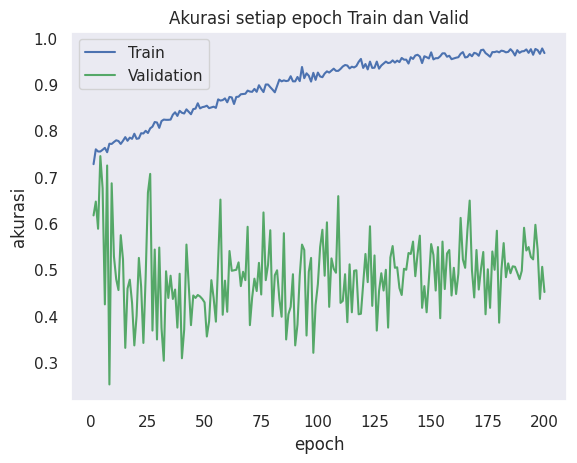

In [9]:
#plot akurasi
plot_valid_train(train_accuracy,valid_accuracy,"Akurasi setiap epoch Train dan Valid","epoch","akurasi")

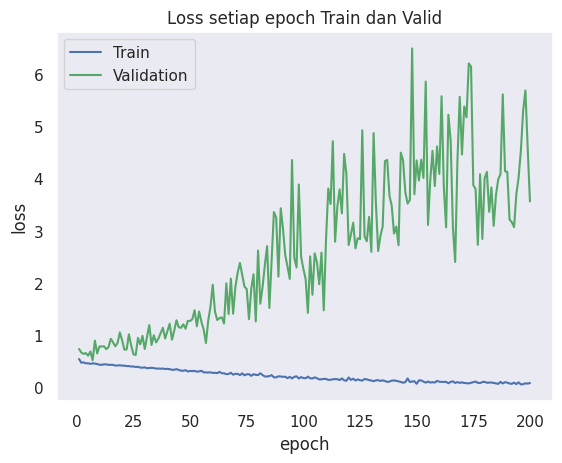

In [10]:
#plot loss
plot_valid_train(train_loss,valid_loss,"Loss setiap epoch Train dan Valid","epoch","loss")

In [11]:
# cross validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True,random_state=22)

for index_train, index_test in skf.split(X,Y):
    train_x, test_x = X[index_train],X[index_test]
    train_y, test_y = Y[index_train], Y[index_test]

    models.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
    )

    models.fit(train_x,train_y,epochs=200,verbose=0)
    scores = models.evaluate(test_x,test_y, verbose=0)

    print("Validation accuracy: {:.2f}%".format(scores[1] * 100))


Validation accuracy: 82.95%
Validation accuracy: 87.50%
Validation accuracy: 95.95%
Validation accuracy: 92.78%
Validation accuracy: 94.19%


In [12]:
#save model
models.save("MLP_Model.h5")

/home/khalifardy/Dokumen/ruang_kerja/code/kuliah/ML/Assignment_CLO1_project_base/prediksi_dropout/.env/lib64/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
